<a href="https://colab.research.google.com/github/prathyusha2020/Dokku_Prathyusha/blob/main/NeuralNetworksCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Feed Forward Neural Implementation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Dropout, Activation

from tensorflow.keras import regularizers


In [ ]:
'''
Creating dataframes by reading genuine users2.csv and fake users fakeusers1.csv
'''
df_users = pd.read_csv("dataset-1-users.csv")
df_fusers = pd.read_csv("dataset-2-fusers.csv")

# New Section

In [ ]:

print("Number of genuine users")
print(len(df_users))

print("Number of fake users")
print(len(df_fusers))

Number of genuine users
1480
Number of fake users
1337


In [ ]:
#Creating numpy array of zeros for attribute isFake, here zero means fake user and 1 means genuine user
fk = np.zeros(len(df_fusers))

#creating an array of ones for isFake attribute
ntFk = np.ones(len(df_users))

#adding new attributes to the data frame of fake and genuine users
df_fusers["isFake"] = fk
df_users["isFake"] = ntFk


In [ ]:
'''
Creating one single data frame by concatenating the two data frames
'''
combine_d = pd.concat([df_fusers, df_users], ignore_index=True)

combine_d.axes


[RangeIndex(start=0, stop=2817, step=1),
 Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
        'friends_count', 'favourites_count', 'listed_count', 'created_at',
        'url', 'lang', 'time_zone', 'location', 'default_profile',
        'default_profile_image', 'geo_enabled', 'profile_image_url',
        'profile_banner_url', 'profile_use_background_image',
        'profile_background_image_url_https', 'profile_text_color',
        'profile_image_url_https', 'profile_sidebar_border_color',
        'profile_background_tile', 'profile_sidebar_fill_color',
        'profile_background_image_url', 'profile_background_color',
        'profile_link_color', 'utc_offset', 'protected', 'verified',
        'description', 'updated', 'dataset', 'isFake'],
       dtype='object')]

In [ ]:
combine_d.columns = combine_d.columns.str.strip()

combine_d.axes
#suffling the data
combine_d = combine_d.sample(frac=1).reset_index(drop=True)

In [ ]:

combine_d.axes
# Creating target variable
target = combine_d.isFake

In [ ]:
combine_d.drop(["isFake"], axis=1, inplace=True)
input_X= combine_d

In [ ]:
target.reset_index(drop=True, inplace=True)

In [ ]:

# Below will create a mapping of language with numerical value
language_ls = list(enumerate(np.unique(input_X["lang"])))
language_dict = {name : i for i, name in language_ls}
input_X.loc[:, "lang_num"] = input_X["lang"].map(lambda x: language_dict[x]).astype(int)

input_X.drop(["name"], axis=1, inplace=True)

In [ ]:
input_X = input_X[[
    "statuses_count",
    "followers_count",
    "friends_count",
    "favourites_count",
    "lang_num",
    "listed_count",
    "geo_enabled",
    "utc_offset",
    "profile_use_background_image"
                        ]]

In [ ]:
# imputing missing values with false
input_X = input_X.replace(np.nan, 0)

In [ ]:
# splitting the data in train and test set
train_X, test_X, train_y, test_y = train_test_split(input_X, target, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(2253, 9)
(564, 9)
(2253,)
(564,)


In [ ]:
from numpy.random import seed
seed(1)

Epoch 1/8
71/71 [==============================] - 1s 2ms/step - loss: 23.0103 - accuracy: 0.9707
Epoch 2/8
71/71 [==============================] - 0s 2ms/step - loss: 10.5463 - accuracy: 0.9854
Epoch 3/8
71/71 [==============================] - 0s 2ms/step - loss: 5.3200 - accuracy: 0.9907
Epoch 4/8
71/71 [==============================] - 0s 2ms/step - loss: 2.8086 - accuracy: 0.9765
Epoch 5/8
71/71 [==============================] - 0s 2ms/step - loss: 2.1134 - accuracy: 0.9334
Epoch 6/8
71/71 [==============================] - 0s 2ms/step - loss: 1.6727 - accuracy: 0.9414
Epoch 7/8
71/71 [==============================] - 0s 2ms/step - loss: 1.3362 - accuracy: 0.9663
Epoch 8/8
71/71 [==============================] - 0s 2ms/step - loss: 0.8889 - accuracy: 0.9525


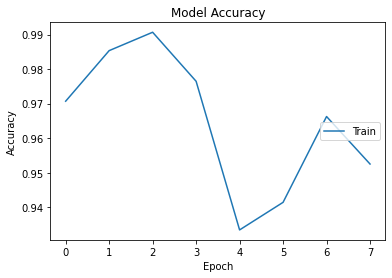

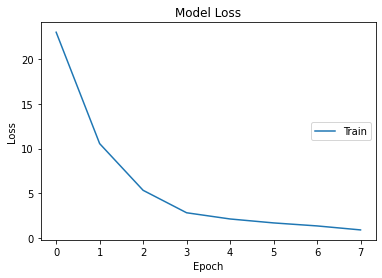

In [ ]:
# Creating the model with one hidden layer 
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=9))
model.add(Dense(64, input_dim=32,
                kernel_regularizer=regularizers.l2(0.0079),
                activity_regularizer=regularizers.l1(0.0026), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_data = model.fit(train_X, train_y, epochs=8)

# Plot training & validation accuracy values
plt.plot(history_data.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='center right')
plt.show()

# Plot training & validation loss values
plt.plot(history_data.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='center right')
plt.show()

In [ ]:
#Evaluating model on validation set
sc, accuracy = model.evaluate(test_X, test_y)

print("==================================================")
print("Accuracy for testing date",accuracy*100 )
print("==================================================")




18/18 [==============================] - 1s 2ms/step - loss: 0.4860 - accuracy: 0.9858
Accuracy for testing date 98.58155846595764
